In [1]:
# importando pacotes
import matplotlib
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

### Primeira Questão 

### Objetivo 

Este projeto tem como objetivo realizar uma análise exploratória acerca de ofertas relâmpago.

### Entendimento dos dados 

Os dados encontram-se em csv (ofertas_relampago.csv) e contém dados referentes a ofertas relâmpago para um período e país específico. Conforme o entendimento de negócio (descrito no arquivo Technical Challenge v3) sabemos que as ofertas costumam durar algumas horas e possuem uma quantidade limitada de produtos.

In [2]:
# puxando os dados 
base_completa = pd.read_csv("arquivos/ofertas_relampago.csv", sep=",")

print("Dimensão da base:", base_completa.shape)
base_completa.head(3)

Dimensão da base: (48746, 13)


,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,lightning_deal,4,-2,4.72,6.0,A,none,PETS FOOD,CPG,MLM-BIRD_FOODS
1,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS
2,2021-06-22,2021-06-22 07:00:00+00:00,2021-06-22 13:00:01+00:00,lightning_deal,15,12,10.73,3.0,NaN,none,COMPUTERS,CE,MLM-SPEAKERS


### Exploratória de Dados 

#### Tipos de dados na base:

In [3]:
base_completa.dtypes.unique()

array([dtype('O'), dtype('int64'), dtype('float64')], dtype=object)

#### Análise para variáveis numéricas:

Primeiro vamos analisar apenas as colunas com valores numéricos.

In [4]:
base_completa.select_dtypes(include=['int64','float64']).dtypes

INVOLVED_STOCK                 int64
REMAINING_STOCK_AFTER_END      int64
SOLD_AMOUNT                  float64
SOLD_QUANTITY                float64
dtype: object

In [5]:
base_completa.describe()

,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY
count,48746.000000,48746.000000,24579.000000,24579.000000
mean,35.007508,30.565216,51.208898,10.851052
std,206.761058,195.813806,175.254414,45.475305
min,1.000000,-192.000000,0.280000,1.000000
25%,5.000000,4.000000,5.730000,1.000000
50%,10.000000,8.000000,12.420000,3.000000
75%,15.000000,15.000000,30.925000,6.000000
max,9000.000000,8635.000000,4836.570000,1646.000000


Dentre algumas informações acima, podemos notar que apenas uma coluna possui valores negativos (quando a quantidade vendida é maior que a quantidade em estoque), a média e o desvio são menores para a coluna de quantidade vendida quando comparada as demais numéricas e para alguns casos não houveram vendas (temos preenchimento para 24.579 SOLD_QUANTITY das 48.746 ofertas relâmpago).

A seguir vamos analisar melhor os casos negativos em estoque restante após o término (REMAINING_STOCK_AFTER_END):

In [6]:
base_completa[base_completa.REMAINING_STOCK_AFTER_END < 0].head()

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,lightning_deal,4,-2,4.72,6.0,A,none,PETS FOOD,CPG,MLM-BIRD_FOODS
7,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-22 23:05:39+00:00,lightning_deal,10,-1,103.03,11.0,NaN,free_shipping,COMPUTERS,CE,MLM-HEADPHONES
8,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-22 23:05:32+00:00,lightning_deal,10,-1,NaN,NaN,NaN,free_shipping,COMPUTERS,CE,MLM-HEADPHONES
29,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 14:20:21+00:00,lightning_deal,5,-4,12.18,9.0,NaN,none,HOME&DECOR,HOME & INDUSTRY,MLM-SOAP_AND_DETERGENT_DISPENSERS
77,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 18:42:19+00:00,lightning_deal,8,-1,12.61,9.0,A,none,PETS FOOD,CPG,MLM-CATS_AND_DOGS_FOODS


A tabela acima parece fazer sentido ter valores negativos, dado que a quantidade vendida foi acima da quantidade em estoque. 

Em alguns casos podemos notar que <b>não existem</b> valores para quantidade vendida (SOLD_QUANTITY) e <b>temos valores</b> para estoque restante após o termino (REMAINING_STOCK_AFTER_END), talvez seja uma falha no banco e seja necessário tratar. Existem algumas alternativas para tratar, como por exemplo, removendo ou realizando algumas contas.

A seguir podemos notar alguns exemplos (com a forma de tratar acima de cada tabela):

In [7]:
print("SOLD_QUANTITY = INVOLVED_STOCK + |REMAINING_STOCK_AFTER_END|:")
base_completa[(base_completa.REMAINING_STOCK_AFTER_END < 0) & pd.isna(base_completa.SOLD_QUANTITY)].iloc[0:3:,4:8]

SOLD_QUANTITY = INVOLVED_STOCK + |REMAINING_STOCK_AFTER_END|:


,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY
8,10,-1,NaN,NaN
3399,5,-1,NaN,NaN
4210,15,-2,NaN,NaN


In [8]:
print("SOLD_QUANTITY = INVOLVED_STOCK - REMAINING_STOCK_AFTER_END")
base_completa[(base_completa.REMAINING_STOCK_AFTER_END > 0) & (base_completa.REMAINING_STOCK_AFTER_END != base_completa.INVOLVED_STOCK) & pd.isna(base_completa.SOLD_QUANTITY)].iloc[0:3:,4:8]

SOLD_QUANTITY = INVOLVED_STOCK - REMAINING_STOCK_AFTER_END


,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY
299,15,7,NaN,NaN
522,100,96,NaN,NaN
623,10,5,NaN,NaN


In [9]:
print("SOLD_QUANTITY = 0")
base_completa[(base_completa.REMAINING_STOCK_AFTER_END == base_completa.INVOLVED_STOCK) & pd.isna(base_completa.SOLD_QUANTITY)].iloc[0:3:,4:8]

SOLD_QUANTITY = 0


,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY
1,5,5,NaN,NaN
5,23,23,NaN,NaN
6,10,10,NaN,NaN


In [10]:
print("SOLD_QUANTITY = INVOLVED_STOCK")
base_completa[(base_completa.INVOLVED_STOCK > 0) & (base_completa.REMAINING_STOCK_AFTER_END == 0) & pd.isna(base_completa.SOLD_QUANTITY)].iloc[0:3:,4:8]

SOLD_QUANTITY = INVOLVED_STOCK


,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY
641,15,0,NaN,NaN
798,2,0,NaN,NaN
813,5,0,NaN,NaN


O tratamento citado acima (caso necessário) poderia ser realizado diretamente no banco ou pelo próprio Python. Vamos ilustrar uma alternativa de como tratar pelo Python:

In [11]:
# caso necessário o cálculo abaixo pode ser refinado para uma abordagem mais "elegante"
def tratamento_1(x):
    return x[4] + abs(x[5])

def tratamento_2(y):
    return y[4] - y[5]

def tratamento_3(z):
    return 0

def tratamento_4(x):
    return x[4]

# vamos realizar os tratamentos a depender das condições 
base_completa['nova_coluna_caso_1'] = base_completa[(base_completa['REMAINING_STOCK_AFTER_END'] < 0) & pd.isna(base_completa['SOLD_QUANTITY'])].apply(tratamento_1, axis=1)
base_completa['nova_coluna_caso_2'] = base_completa[(base_completa['REMAINING_STOCK_AFTER_END'] > 0) & (base_completa['REMAINING_STOCK_AFTER_END'] != base_completa['INVOLVED_STOCK']) & pd.isna(base_completa['SOLD_QUANTITY'])].apply(tratamento_2, axis=1)
base_completa['nova_coluna_caso_3'] = base_completa[(base_completa['REMAINING_STOCK_AFTER_END'] == base_completa['INVOLVED_STOCK']) & pd.isna(base_completa['SOLD_QUANTITY'])].apply(tratamento_3, axis=1)
base_completa['nova_coluna_caso_4'] = base_completa[(base_completa.INVOLVED_STOCK > 0) & (base_completa.REMAINING_STOCK_AFTER_END == 0) & pd.isna(base_completa.SOLD_QUANTITY)].apply(tratamento_4, axis=1)

In [12]:
# na tabela abaixo podemos visualizar um exemplo de cada caso (porém ainda iremos transformar as 4 colunas em apenas 1)
base_completa[['INVOLVED_STOCK','REMAINING_STOCK_AFTER_END','SOLD_QUANTITY','nova_coluna_caso_1','nova_coluna_caso_2','nova_coluna_caso_3', 'nova_coluna_caso_4']].iloc[[8,299,1,641],:]

,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_QUANTITY,nova_coluna_caso_1,nova_coluna_caso_2,nova_coluna_caso_3,nova_coluna_caso_4
8,10,-1,NaN,11.0,NaN,NaN,NaN
299,15,7,NaN,NaN,8.0,NaN,NaN
1,5,5,NaN,NaN,NaN,0.0,NaN
641,15,0,NaN,NaN,NaN,NaN,15.0


In [13]:
# vamos alterar para transformar as 4 colunas em 1

condicao = base_completa[['nova_coluna_caso_1', 'nova_coluna_caso_2', 'nova_coluna_caso_3', 'nova_coluna_caso_4']].isnull().all(axis=1)
soma = base_completa[['nova_coluna_caso_1', 'nova_coluna_caso_2', 'nova_coluna_caso_3', 'nova_coluna_caso_4']].sum(axis=1, skipna=True)
soma[condicao] = np.nan

base_completa['SOLD_QUANTITY_NEW'] = soma

base_completa.drop(columns=['nova_coluna_caso_1', 'nova_coluna_caso_2', 'nova_coluna_caso_3', 'nova_coluna_caso_4'], inplace=True)

In [14]:
# na tabela abaixo podemos visualizar um exemplo de cada caso 
base_completa[['INVOLVED_STOCK','REMAINING_STOCK_AFTER_END','SOLD_QUANTITY','SOLD_QUANTITY_NEW']].iloc[[8,299,1,641],:]

,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_QUANTITY,SOLD_QUANTITY_NEW
8,10,-1,NaN,11.0
299,15,7,NaN,8.0
1,5,5,NaN,0.0
641,15,0,NaN,15.0


In [15]:
# apenas para conferir
base_completa[['SOLD_QUANTITY','SOLD_QUANTITY_NEW']].head(3)

,SOLD_QUANTITY,SOLD_QUANTITY_NEW
0,6.0,NaN
1,NaN,0.0
2,3.0,NaN


In [16]:
# na nova coluna temos preenchimento apenas quando a quantidade vendida é NaN, então podemos preencher os valores restantes com a coluna original, dessa forma teremos todas as linhas preenchidas.
base_completa['SOLD_QUANTITY_NEW'].fillna(value=base_completa['SOLD_QUANTITY'], inplace=True)

In [17]:
base_completa.describe()

,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,SOLD_QUANTITY_NEW
count,48746.000000,48746.000000,24579.000000,24579.000000,48746.000000
mean,35.007508,30.565216,51.208898,10.851052,5.532557
std,206.761058,195.813806,175.254414,45.475305,32.743476
min,1.000000,-192.000000,0.280000,1.000000,0.000000
25%,5.000000,4.000000,5.730000,1.000000,0.000000
50%,10.000000,8.000000,12.420000,3.000000,1.000000
75%,15.000000,15.000000,30.925000,6.000000,3.000000
max,9000.000000,8635.000000,4836.570000,1646.000000,1646.000000


In [18]:
# apenas para conferir
base_completa[['SOLD_QUANTITY','SOLD_QUANTITY_NEW']].head(3)

,SOLD_QUANTITY,SOLD_QUANTITY_NEW
0,6.0,6.0
1,NaN,0.0
2,3.0,3.0


Podemos notar que não existem valores NaN para coluna nova de quantidade vendida.

#### Análise para variáveis categóricas:

Seguiremos com a análise para variáveis do tipo categóricas. 

In [19]:
base_completa.select_dtypes(include=['O']).dtypes

OFFER_START_DATE         object
OFFER_START_DTTM         object
OFFER_FINISH_DTTM        object
OFFER_TYPE               object
ORIGIN                   object
SHIPPING_PAYMENT_TYPE    object
DOM_DOMAIN_AGG1          object
VERTICAL                 object
DOMAIN_ID                object
dtype: object

Podemos notar que algumas colunas referentes a datas estão definidas como objeto, iremos tratar mais adiante.

In [20]:
# mantendo apenas variáveis categoricas 
df_variaveis_categoricas = base_completa[['OFFER_TYPE', 'ORIGIN', 'SHIPPING_PAYMENT_TYPE', 'DOM_DOMAIN_AGG1', 'VERTICAL', 'DOMAIN_ID']]
df_variaveis_categoricas.head()

,OFFER_TYPE,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
0,lightning_deal,A,none,PETS FOOD,CPG,MLM-BIRD_FOODS
1,lightning_deal,NaN,free_shipping,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS
2,lightning_deal,NaN,none,COMPUTERS,CE,MLM-SPEAKERS
3,lightning_deal,NaN,none,COMPUTERS,CE,MLM-HEADPHONES
4,lightning_deal,NaN,none,COMPUTERS,CE,MLM-HEADPHONES


Vamos analisar quantos valores NaN existem em cada variável, pois caso tenham variáveis com valores ausentes expressivos (ex: 98% da base ausente), poderá ser uma dificuldade a depender da análise futura:

In [21]:
variaveis_categoricas = ['OFFER_TYPE', 'ORIGIN', 'SHIPPING_PAYMENT_TYPE', 'DOM_DOMAIN_AGG1', 'VERTICAL', 'DOMAIN_ID']

for variavel in variaveis_categoricas:
    qtd = df_variaveis_categoricas[variavel].isna().sum()
    print(variavel,':',qtd)

OFFER_TYPE : 0
ORIGIN : 37430
SHIPPING_PAYMENT_TYPE : 0
DOM_DOMAIN_AGG1 : 0
VERTICAL : 0
DOMAIN_ID : 0


Pela contagem acima podemos notar que apenas ORIGIN possui valores NaN, totalizando 76% do seu preenchimento. 

Agora podemos analisar a quantidade de grupos em cada variável, pois uma quantidade significativa de grupos pode dificultar uma possível modelagem. 

In [22]:
variaveis_categoricas = ['OFFER_TYPE', 'ORIGIN', 'SHIPPING_PAYMENT_TYPE', 'DOM_DOMAIN_AGG1', 'VERTICAL', 'DOMAIN_ID']

for variavel in variaveis_categoricas:
    qtd = df_variaveis_categoricas[variavel].nunique()
    print(variavel,':',qtd)

OFFER_TYPE : 1
ORIGIN : 1
SHIPPING_PAYMENT_TYPE : 2
DOM_DOMAIN_AGG1 : 36
VERTICAL : 9
DOMAIN_ID : 1266


Conforme cálculo acima, podemos notar que a variável OFFER_TYPE é preenchida com o mesmo valor em todos os casos, ou seja, possivelmente não irá agregar informação a depender das análises futuras. Lembrando que, a variável ORIGIN não segue a mesma conclusão pois existem valores ausentes que podem ser tratados como outra categoria totalizando 2 na contagem acima. Já a variável DOMAIN_ID possivelmente não irá agregar muita informação a depender das análises também, pois contém uma quantidade muito grande de valores distintos.

#### Análise para variáveis de tempo:

In [23]:
print('Início do histórico: ',base_completa.OFFER_START_DATE.min())
print('Fim do histórico: ',base_completa.OFFER_START_DATE.max())

Início do histórico:  2021-06-01
Fim do histórico:  2021-07-31


In [24]:
# conforme análises acima, sabemos que o tipo da variável OFFER_START_DATE é object, vamos alterar para datetime
base_completa['OFFER_START_DATE'] = pd.to_datetime(base_completa['OFFER_START_DATE'])

# contar o número de ocorrências para cada data
contagem_datas = base_completa['OFFER_START_DATE'].value_counts().reset_index()
contagem_datas.columns = ['OFFER_START_DATE', 'QTD']

# apenas para conferir 
contagem_datas.head(3)

,OFFER_START_DATE,QTD
0,2021-07-30,1300
1,2021-07-29,1299
2,2021-07-08,1267


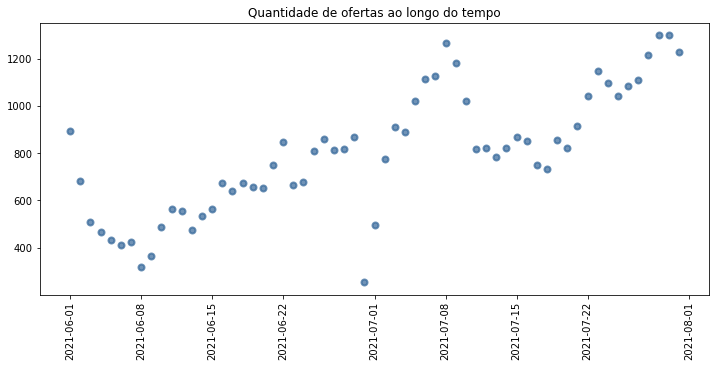

In [25]:
plt.figure(figsize=(12,5))

plt.scatter(
    contagem_datas.OFFER_START_DATE
    ,contagem_datas.QTD
    ,linewidth=2.0
    ,color = '#336699'
    ,alpha = 0.7
)

plt.xticks(rotation=90)

plt.title('Quantidade de ofertas ao longo do tempo')

plt.show()

Podemos notar que existe uma tendência de alta na quantidade de ofertas ao longo do tempo, uma possível explicação para esse aumento no período de 2 meses pode ser o aumento de budge disponibilizado para ofertas com intuito de aumentar o engajamento dos clientes ou mesmo o aumento da companhia e consequentemente o aumento de ofertas dado o período de pandemia e aumento de vendas online. 

Fim